梁时婧 11712638 Assignment 6

In [2]:
import warnings
warnings.filterwarnings("ignore")
import xarray as xr
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import numpy as np

# Question 1

**(1) Calculate the Oceanic Niño Index (ONI) between the years 1982 to 2018.   
(2) Plot the ONI timeseries.   
(3) Determine, based on the operational definition of NOAA (see bottom of this page), the El Niño or La Niña events during this period.**

In [3]:
ncfile1 = '~/project/mc2019/public/Tutorial-03/sst.mnmean.nc'
ds1 = xr.open_dataset(ncfile1)
print(ds1)

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 455)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2019-10-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    dataset_title:  NOAA Optimum Interpolation (OI) SST V

In [4]:
ncfile2 = '~/project/mc2019/public/Tutorial-03/lsmask.nc'
ds2 = xr.open_dataset(ncfile2)
print(ds2)

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1)
Coordinates:
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) datetime64[ns] 1981-10-29
Data variables:
    mask     (time, lat, lon) float32 ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Created 10/2002 by RHS
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oiss...
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/


In [748]:
# Read variables
time = ds1['time'][:]
lat  = ds1['lat'][:]                       
lon  = ds1['lon'][:]
sst  = ds1['sst'][:,:,:]
mask = ds2['mask'][0,:,:]

In [6]:
# Mask out the land area of global SST
for i in range(0,180):
    for j in range(0,360):
        if mask[i,j]==0:
            sst[:,i,j] = 'NaN'

In [389]:
# Select the 30-year period
sst_30y = sst.sel(time=slice('1986','2015'))

# Calculate the monthly mean SST
sstmean = np.zeros((12,180,360))
for i in range(0,12):
    #month = sst_30y.isel(time=slice(i,360,12)).values
    #monthmean = np.mean(month,axis=0)
    #sstmean[i,:,:] = monthmean[:,:]
    sstmean[i] = sst_30y.isel(time=np.arange(i,360,12)).mean(dim='time')

In [391]:
# Calculate the monthly mean SST for the whole regions
sst_anoma = np.zeros((37*12,180,360))
sst_m = sst.sel(time=slice('1982','2018'))
for i in range(0,37*12): #from 1982-02-01 to 2018-11-01
    k = i % 12
    sst_anoma[i] = sst_m.values[i] - sstmean[k]

In [33]:
# Select the Niño 3.4 region
# Niño 3.4 (5N-5S, 170W-120W)
region34 = sst.sel(time=slice('1982','2018')).sel(lat=np.arange(4.5,-5.5,-1)).sel(lon=np.arange(190.5,240.5,1))
ctime = time.sel(time=slice('1982','2018'))
region34_mean = np.mean(region34,axis=(1,2))

In [35]:
# Calculate the monthly mean SST of Niño 3.4 region
region34_m_mean = np.zeros(12)
for i in range(0,12):
    region34_m_mean[i] = np.mean(region34_mean.isel(time=np.arange(i,360,12)).values)

# Calculate the anomalies
# Subtract the monthly mean SST to detrend the seasonal variation
region34_anoma = np.zeros(37*12)
for i in range(0,37*12):
    k = i % 12
    region34_anoma[i] = region34_mean.values[i] - region34_m_mean[k]

In [36]:
# Smooth the anomalies with a 3-month running mean
nstep = int(37*12-(3-1)/2*2)
index_oni = np.zeros(nstep)
for i in range(0,nstep):
    index_oni[i] = np.mean(region34_anoma[i:i+3])

In [158]:
# Mark the El Nino events and La Nina events
# The ONI uses a 3-month running mean, and to be classified as a full-fledged El Niño or La Niña
# The anomalies must exceed +0.5C or -0.5C for at least five consecutive months. 
# This is the operational definition used by NOAA.https://origin.cpc.ncep.noaa.gov/

El_index = np.zeros(len(n_index_oni))
La_index = np.zeros(len(n_index_oni))
for i in range(442-5):
    if (n_index_oni[i:i+5]>0.5).all() == True:
        El_index[i:i+5] = n_index_oni[i:i+5]
    if (n_index_oni[i:i+5]<-0.5).all() == True:
        La_index[i:i+5] = n_index_oni[i:i+5]

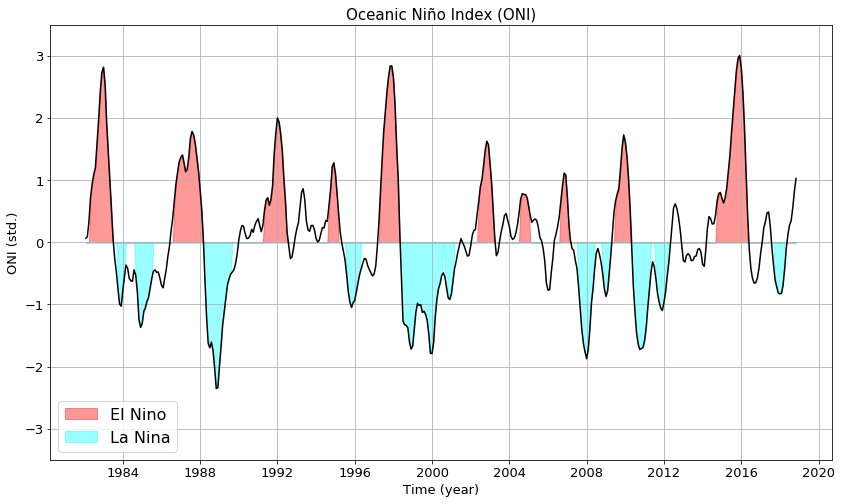

In [284]:
# Make the time series match the data
xtime = ctime.isel(time=np.arange(1,37*12-1)).values

# Normalize the smoothed values by its standard deviation over the period.
n_index_oni = index_oni / np.std(index_oni)

fig, ax = plt.subplots(figsize=(14,8))

ax.plot(xtime,n_index_oni,'k')
ax.tick_params(axis='both',labelsize=13)
ax.set_ylim(-3.5,3.5)
ax.set_xlabel('Time (year)',fontsize=13)
ax.set_ylabel('ONI (std.)',fontsize=13)
ax.set_title('Oceanic Niño Index (ONI)',fontsize=15)
ax.grid()

# Mark the El Nino events and La Nina events        
fil1 = ax.fill_between(xtime,0,El_index,color='r',alpha=0.4)
fil2 = ax.fill_between(xtime,0,La_index,color='cyan',alpha=0.4)
# Add legend
ax.legend([fil1,fil2],['El Nino','La Nina'],fontsize=16)
plt.show()

# Question 2

**(1) Choose the three strongest El Niño events and the three strongest La Niña events during this time period.  
(2) Make a composite (合成) of the December SST anomaly for the three strongest El Niño events.   
(3) Make a composite of the December SST anomaly for the three strongest La Niña events.   
(4) Plot the composite SST anomalies for El Niño and La Niña (Hint: two 2-D maps)**

In [303]:
# create time series that contain El Nino and La Nina events
El_time = xr.DataArray(xtime[El_index != 0],[('time',xtime[El_index != 0])])
La_time = xr.DataArray(xtime[La_index != 0],[('time',xtime[La_index != 0])])

In [258]:
# Select three strongest El Nino events by time
El_event1 = El_time.sel(time=slice('1982'))
El_event2 = El_time.sel(time=slice('1997','1998'))
El_event3 = El_time.sel(time=slice('2014','2016'))

In [308]:
# Select three strongest La Nina events by time
La_event1 = La_time.sel(time=slice('1988','1989'))
La_event23 = La_time.sel(time=slice('1998','2000')) # Two adjacent La Nina events

In [315]:
sst_ann = xr.DataArray(sst_anoma,[('time',ctime),('lat',lat),('lon',lon)])

In [336]:
def comp_dec(event_time):
    event_sst = sst_ann.sel(time=event_time).where(sst_ann.time.dt.month==12,drop=True).mean(dim='time').values
    return event_sst

In [339]:
# Make composite of the December SST anomaly
El_event1_sst = comp_dec(El_event1)
El_event2_sst = comp_dec(El_event2)
El_event3_sst = comp_dec(El_event3)
El_composite = (El_event1_sst+El_event2_sst+El_event3_sst)/3

La_event1_sst = comp_dec(La_event1)
La_event23_sst = comp_dec(La_event23)
La_composite = (La_event1+La_event23)/2

Plot the composite SST

In [351]:
def plotmap():
    plt.figure(figsize=(15,10))
    plt.rcParams['figure.figsize'] = (15,10)
    
    proj = ccrs.PlateCarree(central_longitude=180)
    fig,ax = plt.subplots(subplot_kw=dict(projection=proj))
 
    ax.set_xticks([0,60,120,180,240,300,360],crs=ccrs.PlateCarree())
    ax.set_yticks([-90,-60,-30,0,30,60,90],crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(axis='both',labelsize=13)

    ax.coastlines(zorder=10)
    ax.gridlines(xlocs=np.arange(0,361,30), ylocs=np.arange(-90,91,30))
    
    return fig,ax

Text(0.5, 1.0, 'Composite of El Nino SST anomalies of December 1998-2016 (℃)')

<Figure size 1080x720 with 0 Axes>

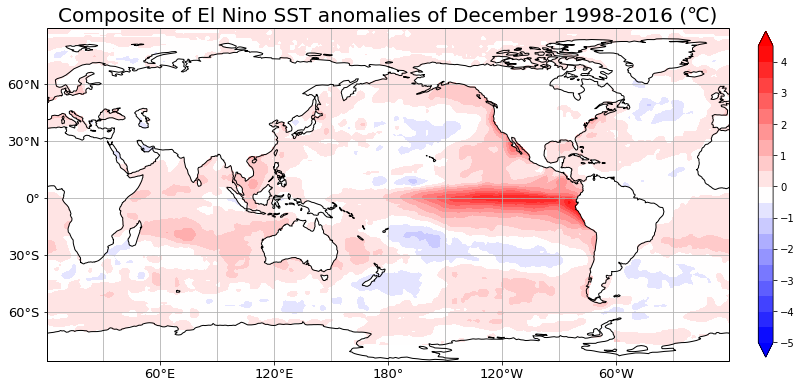

In [431]:
fig,ax = plotmap()
clevs = np.arange(-5,5,0.5)
plt_data = (El_event1_sst+El_event2_sst+El_event3_sst)/3
cf = plt.contourf(lon,lat,plt_data,clevs,cmap='bwr',extend='both',transform=ccrs.PlateCarree())

cbar = plt.colorbar(cf,shrink=0.6,pad=0.035)
ax.set_title('Composite of El Nino SST anomalies of December 1998-2016 (℃)',fontsize=20)

Text(0.5, 1.0, 'Composite of La Nina SST anomalies of December 1988-2000 (℃)')

<Figure size 1080x720 with 0 Axes>

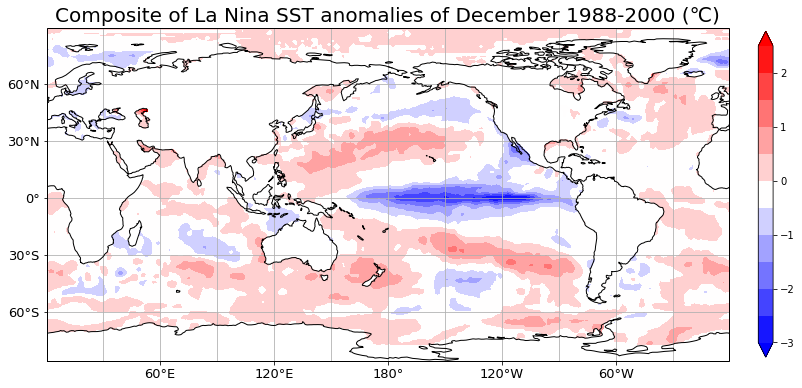

In [432]:
fig,ax = plotmap()
clevs = np.arange(-3,3,0.5)
plt_data = (La_event1_sst+La_event23_sst)/2
cf = plt.contourf(lon,lat,plt_data,clevs,cmap='bwr',extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(cf,shrink=0.6,pad=0.035)
ax.set_title('Composite of La Nina SST anomalies of December 1988-2000 (℃)',fontsize=20)

# Question 3

**(1) Repeat the process of the global SST EOF analysis in tutoral 3.  
(2) Plot the PC (timeseries) that corresponds to the ENSO phenomenon.   
(3) Also plot the ONI (timeseries) in the same plot.  
(4) How are they similar to or different from each other? Why are there differences?**

In [433]:
# Import the EOF function from Pycurrents Package
from pycurrents.num import eof

In [434]:
latweights   = np.sqrt(np.cos(np.deg2rad(lat.values)))
latweights   = latweights[np.newaxis,:,np.newaxis]
sst_anoma_w  = sst_anoma * latweights

EOF analyze

In [437]:
# Mask out the land area of global SST
# Noted that in the EOF analysis, any value must exist and cannot be Nan
for i in range(0,180):
    for j in range(0,360):
        if mask[i,j]==0:
            sst_anoma_w[:,i,j] = 0

Use EOF to analyze the SST anomalies within selected extent

In [441]:
# Do EOF analysis for 60N~60S, 120E~90W
sst_anoma_w_s = sst_anoma_w[:,30:150,120:300]

In [442]:
sst_eof = eof.EOF(sst_anoma_w_s)

<Figure size 1080x432 with 0 Axes>

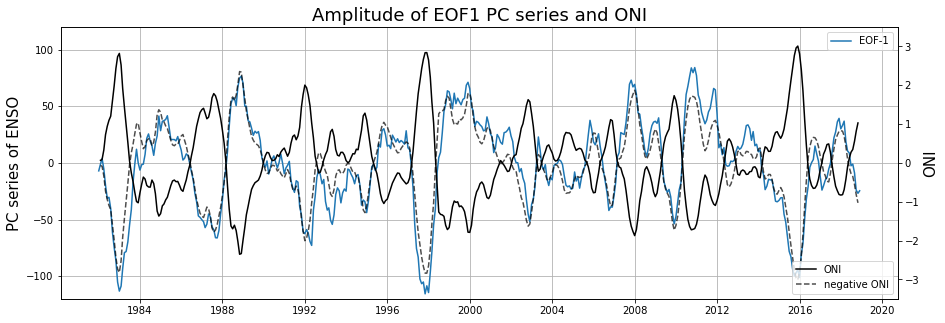

In [508]:
# Plot the amplitude of the first three EOF components
fig = plt.figure(figsize=(15,6))
plt.rcParams['figure.figsize'] = (15,5)

fig, ax = plt.subplots()

ln1 = ax.plot(time.sel(time=slice('1982','2018')),sst_eof.u[:,0]*sst_eof.s[0],label='EOF-1')
ax.set_ylim(-120,120)
ax.set_ylabel('PC series of ENSO',fontsize=15)

ax2 = ax.twinx()
ln2 = ax2.plot(xtime,n_index_oni,'k')
ln3 = ax2.plot(xtime,-n_index_oni,'k',linestyle='--',alpha=0.7)
ax2.set_ylim(-3.5,3.5)
ax2.set_ylabel('ONI',fontsize=15)

ax.set_title('Amplitude of EOF1 PC series and ONI',fontsize=18)
ax.grid()
ax.legend()
ax2.legend(['ONI','negative ONI'],loc='lower right')
plt.show()

**Answer of question 2**  
(1) Though the amplitude is different, the negative ONI (dashed line) has the similar trend with PC1.  
(2) The values of PC1 and ONI are opposite.   
Why they are different?  
Considering the spatial distribution of EOF1, the PC1 series represent the amplitude changes of the abnormal negative SST. The negative values of PC1 suggest that the negative SST anomalies become particularly negative, briefly, SST anomalies are positive and larger. Positive ONI indicates El Nino events, similarly, the negative PC1 also implies El Nino that SST anomalies are higher in the Nino 3.4 region. The amplitude is different because ONI is normalized by the standard derivation of SST anomalies, while PC1 is normalized in another way.

# Question 3

**(1) Repeat the process of the global SST EOF analysis in tutoral 3.   
(2) Plot the EOF (2-D map) that corresponds to the ENSO phenomenon.  
(3) Compare this map to the El Niño composite map (December) you made in Question 2. Comment on how are they similar to or different from each other? Why are there differences?**

In [512]:
sst_eof.v_reshaped.shape

(444, 120, 180)

In [513]:
# Undo the latitude weighting
spatial_data_w = sst_eof.v_reshaped
spatial_data   = spatial_data_w / latweights[:,30:150,:]

# Mask the spatial data
for i in range(0,120):
    for j in range(0,180):
        if mask[i+30,j+120]==0:
            spatial_data[:,i,j] = 'NaN'

In [514]:
def plotmap():
    plt.figure(figsize=(15,10))
    plt.rcParams['figure.figsize'] = (12,8)
    
    proj = ccrs.PlateCarree(central_longitude=180)
    fig,ax = plt.subplots(subplot_kw=dict(projection=proj))
    
    ax.set_xticks([150,180,210,240,270],crs=ccrs.PlateCarree())
    ax.set_yticks([-90,-60,-30,0,30,60,90],crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter()
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.tick_params(axis='both',labelsize=13)

    ax.coastlines(zorder=10)
    ax.gridlines(xlocs=np.arange(0,361,30), ylocs=np.arange(-90,91,30))
    
    return fig,ax

<Figure size 1080x720 with 0 Axes>

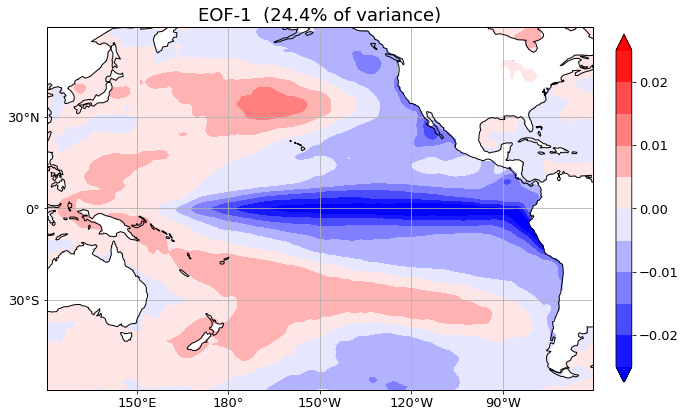

In [515]:
fig,ax = plotmap()

plotx_data = spatial_data[0,:,:]

levelx = np.arange(-0.025,0.026,0.005)
plotx_plot = ax.contourf(np.arange(120.5,300.5,1),np.arange(59.5,-60.5,-1),plotx_data,levels=levelx,cmap='bwr',
                         extend='both',zorder=1,transform=ccrs.PlateCarree())

cbar = plt.colorbar(plotx_plot,shrink=0.8,pad=0.035)
cbar.ax.tick_params(labelsize=13)

ax.set_title('EOF-1  (%.1f%% of variance)'%(sst_eof.percent_var()[0]),fontsize=18)

plt.show()

Text(0.5, 1.0, 'Composite El Nino SST Anomalies')

<Figure size 1080x720 with 0 Axes>

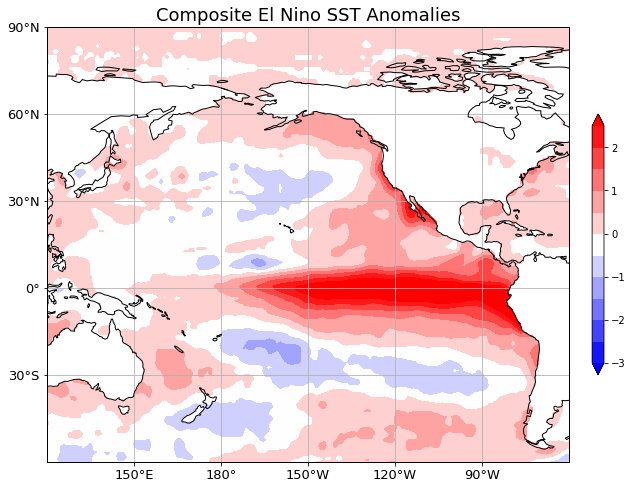

In [749]:
fig,ax = plotmap()
ax.set_extent((120,-60,300,60,))
clevs = np.arange(-3,3,0.5)
plt_data = (El_event1_sst+El_event2_sst+El_event3_sst)/3
cf = plt.contourf(lon,lat,plt_data,clevs,cmap='bwr',extend='both',transform=ccrs.PlateCarree())
cbar = plt.colorbar(cf,shrink=0.6,pad=0.035)

ax.set_title('Composite El Nino SST Anomalies'%(sst_eof.percent_var()[0]),fontsize=18)


**Answer of question 3**  
(1)   
Similar: Though distinct values, the distribution/pattern of EOF1 and SST anomalies are similar.   
Different: The intensity between two figures represents opposite.In Nino 3.4 region, the SST anomalies are the largest, however, the intensity of EOF shows the most negative values. Besides, the EOF1 is more smooth and continuous, while the SST anomalies are fractured.  
(2) Why different?  
Combining PC1 time series and EOF1, the EOF analysis of SST anomalies describes that how the intensity of the negative SST anomalies changes with time. As we can see from the PC1 series, this negative SST anomalies become particular negative for about four to eight years. In other words, the abnormal high SST pattern is observed in these years (El Nino events), which is similar to the figure 2 of composite El Nino SST anamalies. The values are different because EOF1 is normalized, but figure 2 is the SST anomalies (℃).

# Extra

**(1) Calculate the November-December (ND) average of ONI for each year between 1982 to 2018.  
(2) Calculate the correlations between the November-December ONI and the November-December average surface air temperature between 1982 and 2018 for all places in the World.   
(3) Where and how do surface temperature change in association with ENSO?**

In [554]:
# Create the ONI time series data for convenient calculation
oni_index = xr.DataArray(n_index_oni,[('time',xtime)])

In [571]:
# Select ONI from November-December
oni_ND = oni_index.where(oni_index.time.dt.month.isin([11,12]),drop=True)
# Calculate the average for each year
oni_ND_mean = oni_ND.groupby(oni_ND.time.dt.year).mean()

In [577]:
#Open the surface temperature dataset and print out metadeta
ncfile_air = 'public/T2-dataset/long_term_144x73/air.mon.mean.nc'
ds_air = xr.open_dataset(ncfile_air)

In [580]:
# Select variable, pressure level, and time range
air = ds_air['air'].sel(level=1000,time=slice('1982-02-01','2018-11-01'))

lat = air.lat
lon = air.lon

In [582]:
air_ND = air.where(air.time.dt.month.isin([11,12]),drop=True)
air_ND_mean = air_ND.groupby(air_ND.time.dt.year).mean(dim='time')

In [661]:
air_oni_cor = np.zeros((73,144))
for i in range(73):
    for j in range(144):
        air_i = air_ND_mean.sel(lat=lat[i],lon=lon[j]).squeeze()
        air_oni_cor[i][j] = np.corrcoef(oni_ND_mean,air_i).min()

In [662]:
mask_int = mask.interp(lat=lat,lon=lon)
for i in range(0,73):
    for j in range(0,144):
        if mask_int[i,j]==1:
            air_oni_cor[i,j] = 'NaN'

Text(0.5, 1.0, 'ONI correlation with Surface Temperature (%)')

<Figure size 1080x720 with 0 Axes>

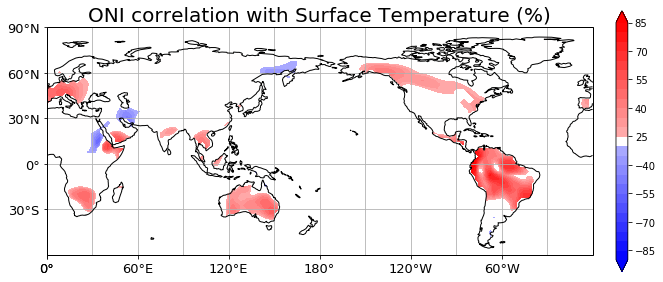

In [746]:
fig,ax = plotmap()
ax.set_extent((100,-60,300,90,))
clevs = np.append(np.arange(-90,-26,5),np.arange(25,90,5))
plt_data = air_oni_cor*100
cf = plt.contourf(lon,lat,plt_data,clevs,cmap='bwr',extend='both',transform=ccrs.PlateCarree())

ax.set_xticks([0,60,120,180,240,300,360],crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

cbar = plt.colorbar(cf,shrink=0.6,pad=0.035)
ax.set_title('ONI correlation with Surface Temperature (%)',fontsize=20)

**Where and how do surface temperature change in association with ENSO?**  
When the ONI is positive and indicate a potential El Nino event, the surface temperature in South Africa, Australia, Southeast Asia,and South America will likely to increase in November-December. Stonger correlation are found in South America, the Amazon regions. While some regions, such as Siberia, are negatively correlated with ONI, which means, during the El Nino event, the regional surface temperature is lilely to decrease in November-December.